In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable
import numpy as np
from torch.utils.data import TensorDataset, DataLoader
import scipy.stats as stats
from math import isclose
np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:f}'.format})


import time
import timeit   
%pylab inline
from matplotlib import cm
from IPython.display import HTML
_SAVE_GIFS= False
rcParams.update({'axes.labelsize': 17.,
              'font.size': 12.,
              'legend.fontsize': 17.,
              'xtick.labelsize':15.,
              'ytick.labelsize':15.,
              'text.usetex': _SAVE_GIFS,
              'figure.figsize': [10,10],
              'xtick.major.size' : 4,
              'ytick.major.size' : 4,
              'xtick.minor.size' : 2,
              'ytick.minor.size' : 2,
              'legend.numpoints':1})

Populating the interactive namespace from numpy and matplotlib


### STEP 1: LOADING DATASET

In [2]:
'''
STEP 1: LOADING DATASET
'''

N = 10000
xv = 0
x_min = -30.
x_max = 25.
x_range = x_max - x_min
v_min = -8.
v_max = 6.
v_range = v_max - v_min


train_array = np.load('/Users/JawanHaider/Desktop/Research/1500/Code/Data/varpert_varsigma_varspiralsech2_rho_train_4800.npy')

train_in_mean = np.transpose(train_array[0, :, :, :-2].mean(axis=2))
mean_sub = np.transpose(train_array[0, :, :, :-2]) - train_in_mean
train_in_var = np.transpose(train_array[0, :, :, :-2].std(axis=2))
train_array[0, :, :, :-2] = np.transpose(mean_sub/   train_in_var    )

train_out_mean = np.transpose(train_array[1, :, :, :-2].mean(axis=2))
mean_sub = np.transpose(train_array[1, :, :, :-2]) - train_out_mean
train_out_var = np.transpose(train_array[1, :, :, :-2].std(axis=2))
train_array[1, :, :, :-2] = np.transpose(mean_sub/   train_out_var    )

train_array = np.swapaxes(train_array, 1, 2)
train_tensor = torch.Tensor(train_array)
train_dataset = TensorDataset(train_tensor[0, :, :, :], train_tensor[1, :, :, :-2]) # create your datset



test_array = np.load('/Users/JawanHaider/Desktop/Research/1500/Code/Data/varpert_varsigma_varspiralsech2_rho_test_2100.npy')
# test_array = np.load('/Users/JawanHaider/Desktop/Research/1500/Code/Data/varpert_varspiralsech2_rho_test_2000xv1.npy')

test_in_mean = np.transpose(test_array[0, :, :, :-2].mean(axis=2))
mean_sub = np.transpose(test_array[0, :, :, :-2]) - test_in_mean
test_in_var = np.transpose(test_array[0, :, :, :-2].std(axis=2))
test_array[0, :, :, :-2] = np.transpose(mean_sub/   test_in_var    )

test_out_mean = np.transpose(test_array[1, :, :, :-2].mean(axis=2))
mean_sub = np.transpose(test_array[1, :, :, :-2]) - test_out_mean
test_out_var = np.transpose(test_array[1, :, :, :-2].std(axis=2))
test_array[1, :, :, :-2] = np.transpose(mean_sub/   test_out_var    )

test_array = np.swapaxes(test_array, 1, 2)
test_tensor = torch.Tensor(test_array)
test_dataset = TensorDataset(test_tensor[0, :, :, :], test_tensor[1, :, :, :-2]) # create your datset



deg_freedom = train_tensor[0, 0, :, 0].size()[0]
train_size = train_tensor[0, :, 0, 0].size()[0]
test_size = test_tensor[0, :, 0, 0].size()[0]
num_datapoints = train_tensor[0, 0, 0, :].size()[0]-2
train_amp = np.unique(train_array[0, :, 0, -2])
train_alpha = np.unique(train_array[0, :, 0, -1])
test_amp = np.unique(test_array[0, :, 0, -2])
test_alpha = np.unique(test_array[0, :, 0, -1])


print(deg_freedom, train_size, test_size, num_datapoints)
print(train_array.shape)
print(train_amp)
print(test_amp)
# tst = np.transpose( np.transpose(train_array[0, :, :, :])*np.transpose(train_in_var)+np.transpose(train_in_mean) )
# print(tst.shape)
# print(tst[999, 1, :])

2 4800 2100 500
(2, 4800, 2, 502)
[0.000000 0.818182 1.636364 2.454545 3.272727 4.090909 4.909091 5.727273
 6.545455 7.363636 8.181818 9.000000]
[0.000000 0.473684 0.947368 1.421053 1.894737 2.368421 2.842105 3.315789
 3.789474 4.263158 4.736842 5.210526 5.684211 6.157895 6.631579 7.105263
 7.578947 8.052632 8.526316 9.000000]


(2, 2, 4800, 502)


Text(0, 0.5, '$\\rho(x)$')

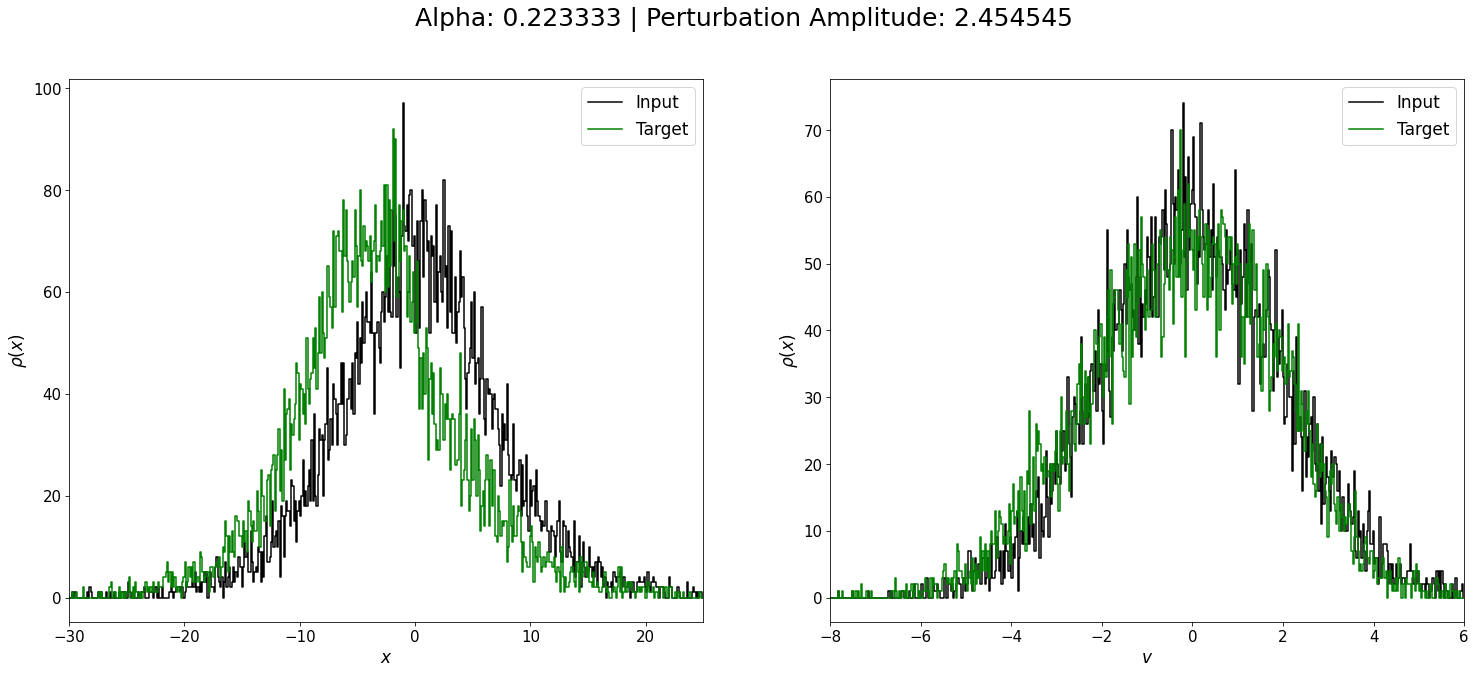

In [3]:
'''
STEP 10: PLOTTING THE RESULTS
'''

train_test = np.load('/Users/JawanHaider/Desktop/Research/1500/Code/Data/varpert_varsigma_varspiralsech2_rho_train_4800.npy')
print(train_test.shape)

fig, (ax1, ax2) = subplots(1, 2, figsize=(25,10))

datapoint = 3999
xv = 0
width = x_range/num_datapoints
bins = np.linspace(x_min, x_max, num=num_datapoints, endpoint=False)

fig.suptitle('Alpha: %f' %train_test[0, xv, datapoint, -1] + " | Perturbation Amplitude: %f" %train_test[0, xv, datapoint, -2], fontsize=25)
# fig.suptitle('Alpha: %f' %alpha[datapoint], fontsize=25)

ax1.step(bins, train_test[0, xv, datapoint, :-2], where="post", c='k', label='Input')
ax1.step(bins, train_test[1, xv, datapoint, :-2], where="post", c='g', label='Target')
ax1.legend()
ax1.set_xlim(x_min, x_max)
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$\rho(x)$')

xv = 1
width = v_range/num_datapoints
bins = np.linspace(v_min, v_max, num=num_datapoints, endpoint=False)

ax2.step(bins, train_test[0, xv, datapoint, :-2], where="post", c='k', label='Input')
ax2.step(bins, train_test[1, xv, datapoint, :-2], where="post", c='g', label='Target')
ax2.legend()
ax2.set_xlim(v_min, v_max)
ax2.set_xlabel(r'$v$')
ax2.set_ylabel(r'$\rho(x)$')

### STEP 2: MAKING DATASET ITERABLE

In [4]:
'''
STEP 2: MAKING DATASET ITERABLE
'''

batch_size = 200
num_batches = train_size/batch_size
print(num_batches)

n_iters = 50000

num_epochs = n_iters / num_batches
num_epochs = int(num_epochs)
print(num_epochs)

train_loader = DataLoader(dataset=train_dataset, 
                            batch_size=batch_size, 
                            shuffle=False)

test_loader = DataLoader(dataset=test_dataset, 
                            batch_size=100, 
                            shuffle=False)

24.0
2083


### STEP 3: CREATING MODEL CLASS

In [5]:
'''
STEP 3: CREATE MODEL CLASS
'''

class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        # Linear function 1: 784 --> 100
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        # Non-linearity 1
        self.relu1 = nn.Tanh()
        
        # Linear function 2: 100 --> 100
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 2
        self.relu2 = nn.Tanh()

        # Linear function 3: 100 --> 100
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 3
        self.relu3 = nn.Tanh()

        # Linear function 4: 100 --> 100
        self.fc4 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 4
        self.relu4 = nn.Tanh()

        # Linear function 5: 100 --> 100
        self.fc5 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 5
        self.relu5 = nn.Tanh()

        # Linear function 6: 100 --> 100
        self.fc6 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 6
        self.relu6 = nn.Tanh()
        
        # Linear function 7 (readout): 100 --> 10
        self.fc7 = nn.Linear(hidden_dim, output_dim)  
    
    def forward(self, x):
        # Linear function 1
        out = self.fc1(x)
        # Non-linearity 1
        out = self.relu1(out)
        
        # Linear function 2
        out = self.fc2(out)
        # Non-linearity 2
        out = self.relu2(out)
        
        # Linear function 3
        out = self.fc3(out)
        # Non-linearity 3
        out = self.relu3(out)

        # Linear function 4
        out = self.fc4(out)
        # Non-linearity 4
        out = self.relu4(out)

        # # Linear function 5
        # out = self.fc5(out)
        # # Non-linearity 5
        # out = self.relu5(out)

        # # Linear function 6
        # out = self.fc6(out)
        # # Non-linearity 6
        # out = self.relu6(out)
        
        # Linear function 7 (readout)
        out = self.fc7(out)

        return out

### STEP 4: INSTANTIATING MODEL CLASS

In [6]:
'''
STEP 4: INSTANTIATE MODEL CLASS
'''

input_dim = 2*num_datapoints+2
hidden_dim = input_dim
output_dim = input_dim-2
print(input_dim, hidden_dim, output_dim)

model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)

1002 1002 1000


### STEP 5: INSTANTIATING LOSS CLASS

In [7]:
'''
STEP 5: INSTANTIATE LOSS CLASS
'''

criterion = nn.MSELoss()

### STEP 6: INSTANTIATING OPTIMIZER CLASS

In [8]:
'''
STEP 6: INSTANTIATE OPTIMIZER CLASS
'''

learning_rate = 0.1

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

### STEP 7: TRAINING THE MODEL

In [9]:
'''
STEP 7: TRAIN THE MODEL
'''

iter = 0
train_predictions = np.empty((2, output_dim))
# all_true_outputs = np.empty((0, output_dim))
# all_model_outputs = np.empty((0, output_dim))

start = time.time()

for epoch in range(num_epochs):
    # print("Epoch:", epoch)
    for i, (inputs, true_outputs) in enumerate(train_loader):
        # print("i:", i)
        
        inputs = Variable(inputs.view(-1, input_dim+2))
        temp = inputs.detach().numpy()
        temp = np.delete(temp, [num_datapoints, num_datapoints+1], axis=1)
        inputs = torch.tensor(temp)
        inputs = Variable(inputs)

        true_outputs = Variable(true_outputs.view(-1, output_dim))
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Forward pass to get output/logits
        model_outputs = model(inputs)
        
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(model_outputs, true_outputs)
        
        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        
        iter += 1
        
        if iter % 1000 == 0:


            # Calculate Train Accuracy         
            correct = 0
            total = 0
            # Iterate through train dataset
            for inputs, true_outputs in train_loader:
                inputs = Variable(inputs.view(-1, input_dim+2))
                temp = inputs.detach().numpy()
                temp = np.delete(temp, [num_datapoints, num_datapoints+1], axis=1)
                inputs = torch.tensor(temp)
                inputs = Variable(inputs)

                true_outputs = Variable(true_outputs.view(-1, output_dim))

                # Forward pass only to get logits/output
                model_outputs = model(inputs)

                # Total number of true_outputs
                total += true_outputs.nelement()

                nppredicted = model_outputs.detach().numpy()
                nptrue = true_outputs.numpy()
                size = np.size(nptrue, 0)

                for j in range(size):
                    predicted = nppredicted[j,:]
                    true = nptrue[j,:]

                    # Total correct predictions
                    correct += (np.isclose(predicted, true, rtol=0.1)).sum()
            
            train_predictions[0, :] = true
            train_predictions[1, :] = predicted

            train_accuracy = 100 * correct / total




            # Calculate Test Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for inputs, true_outputs in test_loader:
                inputs = Variable(inputs.view(-1, input_dim+2))
                temp = inputs.detach().numpy()
                temp = np.delete(temp, [num_datapoints, num_datapoints+1], axis=1)
                inputs = torch.tensor(temp)
                inputs = Variable(inputs)

                true_outputs = Variable(true_outputs.view(-1, output_dim))

                # Forward pass only to get logits/output
                model_outputs = model(inputs)

                # Total number of true_outputs
                total += true_outputs.nelement()

                nppredicted = model_outputs.detach().numpy()
                nptrue = true_outputs.numpy()
                size = np.size(nptrue, 0)

                for j in range(size):
                    predicted = nppredicted[j,:]
                    true = nptrue[j,:]

                    # Total correct predictions
                    correct += (np.isclose(predicted, true, rtol=0.1)).sum()
            
            test_accuracy = 100 * correct / total




            # Print Loss
            print('Iteration: {}. Loss: {}. Train Accuracy: {}. Test Accuracy: {}'.format(iter, loss.data, train_accuracy, test_accuracy))
end = time.time()

print("--- %s seconds ---" % (end - start))

Iteration: 1000. Loss: 0.09745755791664124. Train Accuracy: 25.864270833333332. Test Accuracy: 28.666285714285713
Iteration: 2000. Loss: 0.13658173382282257. Train Accuracy: 34.533125. Test Accuracy: 35.51019047619047
Iteration: 3000. Loss: 0.12504775822162628. Train Accuracy: 36.059875. Test Accuracy: 37.41876190476191
Iteration: 4000. Loss: 0.05504531413316727. Train Accuracy: 40.630291666666665. Test Accuracy: 41.746047619047616
Iteration: 5000. Loss: 0.10990293323993683. Train Accuracy: 42.818645833333335. Test Accuracy: 42.636047619047616
Iteration: 6000. Loss: 0.11874615401029587. Train Accuracy: 45.235479166666664. Test Accuracy: 44.22461904761905
Iteration: 7000. Loss: 0.045405223965644836. Train Accuracy: 48.04691666666667. Test Accuracy: 46.343809523809526
Iteration: 8000. Loss: 0.10626063495874405. Train Accuracy: 49.019083333333334. Test Accuracy: 46.61680952380952
Iteration: 9000. Loss: 0.11583249270915985. Train Accuracy: 50.228208333333335. Test Accuracy: 46.968285714285

### STEP 8: TESTING THE MODEL 

In [4]:
'''
STEP 8A: TESTING THE MODEL WITH TEST DATA
'''

input_array = np.empty((0, input_dim))
output_array = np.empty((0, output_dim))
target_array = np.empty((0, output_dim))

start = time.time()

iter = 0
# Iterate through test dataset
for inputs, true_outputs in test_loader:
    iter += 1
    
    inputs = Variable(inputs.view(-1, input_dim+2))
    temp = inputs.detach().numpy()
    temp = np.delete(temp, [60, 61], axis=1)
    inputs = torch.tensor(temp)
    inputs = Variable(inputs)
    
    true_outputs = Variable(true_outputs.view(-1, output_dim))

    # Forward pass only to get logits/output
    model_outputs = model(inputs)

    loss = criterion(model_outputs, true_outputs)
    
    npinputs = inputs.detach().numpy()
    input_array = np.concatenate((input_array, npinputs))

    npoutputs = model_outputs.detach().numpy()
    output_array = np.concatenate((output_array, npoutputs))

    nptargets = true_outputs.detach().numpy()
    target_array = np.concatenate((target_array, nptargets))
    
    print('Batch: {}. Loss: {}.'.format(iter, loss.data))

end = time.time()

print(f"\nRuntime of the program is {end - start} seconds")

NameError: name 'np' is not defined

In [14]:
'''
STEP 8B: TESTING THE MODEL WITH TRAIN DATA
'''

input_array = np.empty((0, input_dim))
output_array = np.empty((0, output_dim))
target_array = np.empty((0, output_dim))

start = time.time()

iter = 0
# Iterate through test dataset
for inputs, true_outputs in train_loader:
    iter += 1
    
    inputs = Variable(inputs.view(-1, input_dim+2))
    temp = inputs.detach().numpy()
    temp = np.delete(temp, [60, 61], axis=1)
    inputs = torch.tensor(temp)
    inputs = Variable(inputs)
    
    true_outputs = Variable(true_outputs.view(-1, output_dim))

    # Forward pass only to get logits/output
    model_outputs = model(inputs)

    loss = criterion(model_outputs, true_outputs)
    
    npinputs = inputs.detach().numpy()
    input_array = np.concatenate((input_array, npinputs))

    npoutputs = model_outputs.detach().numpy()
    output_array = np.concatenate((output_array, npoutputs))

    nptargets = true_outputs.detach().numpy()
    target_array = np.concatenate((target_array, nptargets))
    
    print('Batch: {}. Loss: {}.'.format(iter, loss.data))

end = time.time()

print(f"\nRuntime of the program is {end - start} seconds")

Batch: 1. Loss: 0.1575017273426056.
Batch: 2. Loss: 0.1653158962726593.
Batch: 3. Loss: 0.17770151793956757.
Batch: 4. Loss: 0.11611708998680115.
Batch: 5. Loss: 0.16030468046665192.
Batch: 6. Loss: 0.18313582241535187.
Batch: 7. Loss: 0.11919986456632614.
Batch: 8. Loss: 0.13443464040756226.
Batch: 9. Loss: 0.1449468433856964.
Batch: 10. Loss: 0.08719512075185776.
Batch: 11. Loss: 0.07443739473819733.
Batch: 12. Loss: 0.04536018893122673.
Batch: 13. Loss: 0.05757146328687668.
Batch: 14. Loss: 0.062269750982522964.
Batch: 15. Loss: 0.06296269595623016.
Batch: 16. Loss: 0.051945485174655914.
Batch: 17. Loss: 0.054192446172237396.
Batch: 18. Loss: 0.04591531306505203.
Batch: 19. Loss: 0.0530916266143322.
Batch: 20. Loss: 0.05235664173960686.
Batch: 21. Loss: 0.051591191440820694.
Batch: 22. Loss: 0.04907593876123428.
Batch: 23. Loss: 0.04965537041425705.
Batch: 24. Loss: 0.05253108963370323.

Runtime of the program is 1.4550316333770752 seconds


### STEP 9: DENORMALIZING THE DATA

In [30]:
'''
STEP 9A: DENORMALIZING THE DATA
'''
size = test_size
print(target_array.shape)
target_array = np.reshape(target_array, (size, 2, 500))
output_array = np.reshape(output_array, (size, 2, 500))

alpha = input_array[:, -1]
amp = input_array[:, -2]
test_alpha = np.unique(alpha)
test_amp = np.unique(amp)
print(input_array.shape)
input_array = np.delete(input_array, [500, 501], axis=1)
print(input_array.shape)
input_array = np.reshape(input_array, (size, 2, 500))


target_array = np.transpose(target_array) * np.transpose(test_out_var) 
target_array = np.transpose( target_array + np.transpose(test_out_mean) )
target_array[target_array < 0] = 0

output_array = np.transpose(output_array) * np.transpose(test_out_var)
output_array = np.transpose( output_array + np.transpose(test_out_mean) )
output_array[output_array < 0] = 0

input_array = np.transpose(input_array) * np.transpose(test_in_var)
input_array = np.transpose( input_array + np.transpose(test_in_mean) )
input_array[input_array < 0] = 0

(2100, 1000)
(2100, 1002)
(2100, 1000)


In [15]:
'''
STEP 9B: DENORMALIZING THE DATA
'''
size = train_size

target_array = np.reshape(target_array, (size, 2, num_datapoints))
output_array = np.reshape(output_array, (size, 2, num_datapoints))

alpha = input_array[:, -1]
amp = input_array[:, -2]
test_alpha = np.unique(alpha)
test_amp = np.unique(amp)
print(input_array.shape)
input_array = np.delete(input_array, [num_datapoints, num_datapoints+1], axis=1)
print(input_array.shape)
input_array = np.reshape(input_array, (size, 2, num_datapoints))


target_array = np.transpose(target_array) * np.transpose(train_out_var) 
target_array = np.transpose( target_array + np.transpose(train_out_mean) )
target_array[target_array < 0] = 0

output_array = np.transpose(output_array) * np.transpose(train_out_var)
output_array = np.transpose( output_array + np.transpose(train_out_mean) )
output_array[output_array < 0] = 0

input_array = np.transpose(input_array) * np.transpose(train_in_var)
input_array = np.transpose( input_array + np.transpose(train_in_mean) )
input_array[input_array < 0] = 0

(4800, 1002)
(4800, 1000)


### STEP 10: PLOTTING THE RESULTS

In [16]:
print(train_alpha, "\n\n", test_alpha, "\n\n")
print(train_amp, "\n\n", test_amp)

[0.010000 0.081111 0.152222 0.223333 0.294444 0.365556 0.436667 0.507778
 0.578889 0.650000] 

 [0.010000 0.081111 0.152222 0.223333 0.294444 0.365556 0.436667 0.507778
 0.578889 0.650000] 


[0.000000 0.818182 1.636364 2.454545 3.272727 4.090909 4.909091 5.727273
 6.545455 7.363636 8.181818 9.000000] 

 [0.000000 0.818182 1.636364 2.454545 3.272727 4.090909 4.909091 5.727273
 6.545455 7.363636 8.181818 9.000000]


In [17]:
input_array.shape

(4800, 2, 500)

Text(0, 0.5, '$\\rho(x)$')

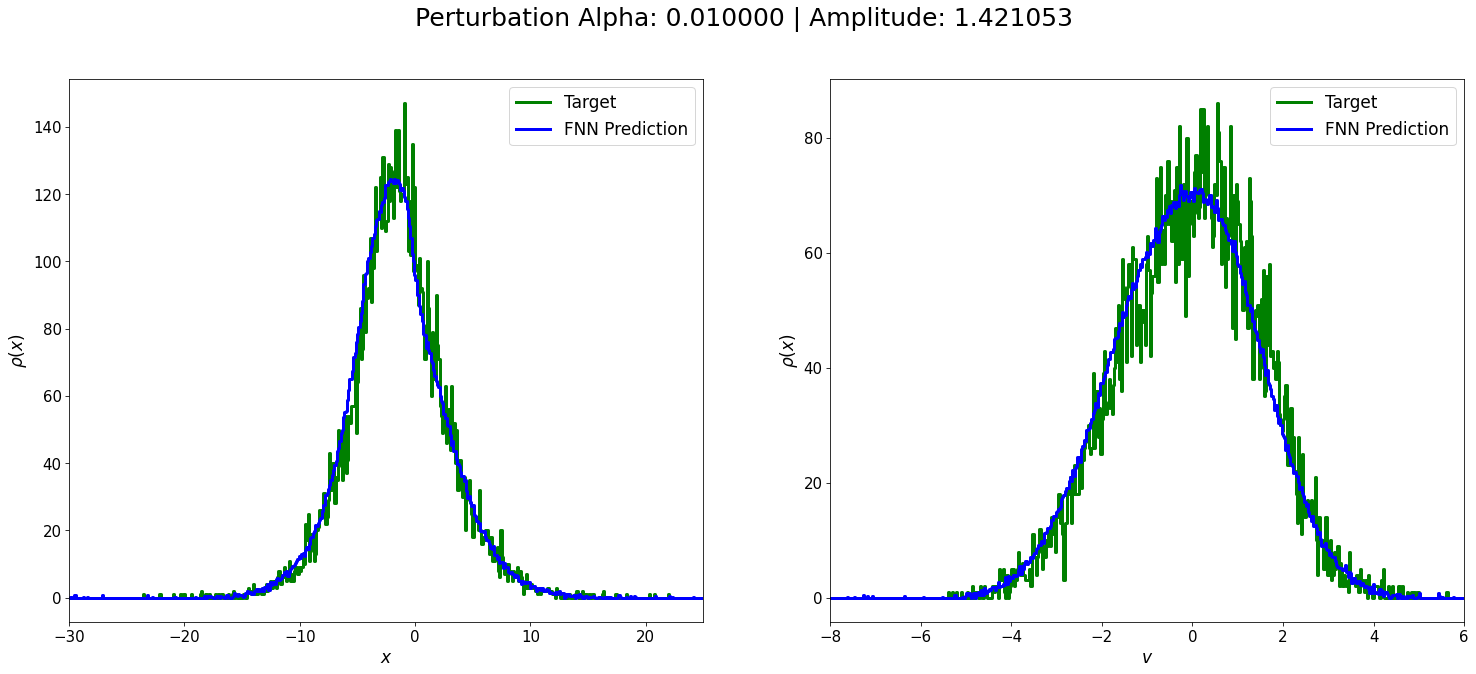

In [32]:
'''
STEP 10: PLOTTING THE RESULTS
'''

fig, (ax1, ax2) = subplots(1, 2, figsize=(25,10))

datapoint = 1203
xv = 0
width = x_range/num_datapoints
bins = np.linspace(x_min, x_max, num=num_datapoints, endpoint=False)

fig.suptitle('Perturbation Alpha: %f' %alpha[datapoint] + " | Amplitude: %f" %amp[datapoint], fontsize=25)
# fig.suptitle('Alpha: %f' %alpha[datapoint], fontsize=25)

# ax1.bar(bins, input_array[datapoint, xv, :], width=width, lw=2., ec='k', fill=False, align='edge', label='Input')
ax1.step(bins, target_array[datapoint, xv, :], where="post", lw=3., c='g', label='Target')
ax1.step(bins, output_array[datapoint, xv, :], where="post", lw=3., c='b', label='FNN Prediction')

ax1.legend()
ax1.set_xlim(x_min, x_max)
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$\rho(x)$')

xv = 1
width = v_range/num_datapoints
bins = np.linspace(v_min, v_max, num=num_datapoints, endpoint=False)

# ax2.bar(bins, input_array[datapoint, xv, :], width=width, lw=2., ec='k', fill=False, align='edge', label='Input')
ax2.step(bins, target_array[datapoint, xv, :], where="post", lw=3., c='g', label='Target')
ax2.step(bins, output_array[datapoint, xv, :], where="post", lw=3., c='b', label='FNN Prediction')
ax2.legend()
ax2.set_xlim(v_min, v_max)
ax2.set_xlabel(r'$v$')
ax2.set_ylabel(r'$\rho(x)$')

### STEP 11: MEASURING PERFORMANCE

In [2]:
cum_input = np.cumsum(input_array, axis=2)
cum_output = np.cumsum(output_array, axis=2)
cum_target = np.cumsum(target_array, axis=2)

NameError: name 'np' is not defined

In [3]:
output_max = cum_output.max(axis=2)
target_max = cum_target.max(axis=2)

norm_cum_output = np.transpose(np.transpose(cum_output) / np.transpose(output_max))
norm_cum_target = np.transpose(np.transpose(cum_target) / np.transpose(target_max))

max_diff = np.abs(norm_cum_output - norm_cum_target).max(axis=2)
print(max_diff.shape)

crit_value = 1.36 / np.sqrt(num_datapoints)
print(crit_value)

null = np.where(max_diff < crit_value, 1, 0)
numpy.set_printoptions(threshold=sys.maxsize)
# print(null)

print(np.where(null == 0)[0].size)

# kuiper test??

NameError: name 'cum_output' is not defined

Text(0, 0.5, '$\\rho(x)$')

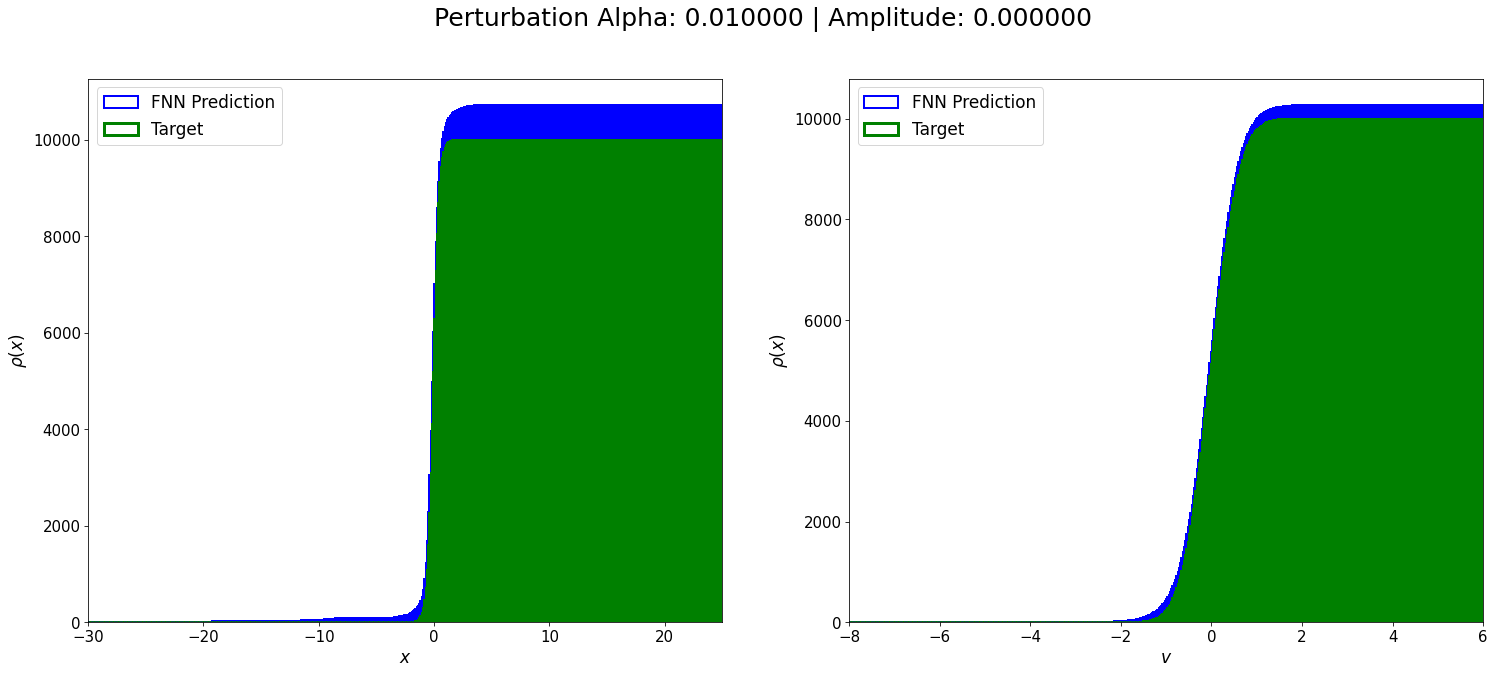

In [28]:
'''
STEP 10: PLOTTING THE RESULTS
'''

fig, (ax1, ax2) = subplots(1, 2, figsize=(25,10))

datapoint = 0
xv = 0
width = x_range/num_datapoints
bins = np.linspace(x_min, x_max, num=num_datapoints, endpoint=False)

fig.suptitle('Perturbation Alpha: %f' %alpha[datapoint] + " | Amplitude: %f" %amp[datapoint], fontsize=25)

ax1.bar(bins, cum_output[datapoint, xv, :], width=width, lw=2., ec='b', fill=False, align='edge', label='FNN Prediction')
ax1.bar(bins, cum_target[datapoint, xv, :], width=width, lw=3., ec='g', fill=False, align='edge', label='Target')
ax1.legend()
ax1.set_xlim(x_min, x_max)
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$\rho(x)$')

xv = 1
width = v_range/num_datapoints
bins = np.linspace(v_min, v_max, num=num_datapoints, endpoint=False)

ax2.bar(bins, cum_output[datapoint, xv, :], width=width, lw=2., ec='b', fill=False, align='edge', label='FNN Prediction')
ax2.bar(bins, cum_target[datapoint, xv, :], width=width, lw=3., ec='g', fill=False, align='edge', label='Target')
ax2.legend()
ax2.set_xlim(v_min, v_max)
ax2.set_xlabel(r'$v$')
ax2.set_ylabel(r'$\rho(x)$')

In [52]:
'''
STEP 11: MEASURING PERFORMANCE
'''

output_array_flt = output_array.flatten()
target_array_flt  = target_array.flatten()

rel_err = np.empty(test_size)

for i in range(test_size):
    if target_array_flt[i]==0 or output_array_flt[i]==0:
        rel_err[i] = 0
    else:
        rel_err[i] = np.abs(output_array_flt[i]-target_array_flt[i])/(target_array_flt[i])

print("Relative error:", rel_err.mean()*100, "%")

Relative error: 6876747.244766903 %
